# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random as rand

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roles():
    df = pd.DataFrame()
    rolls = 10
    for roll in range(0,rolls):
        d = {'results': rand.randint(1,6),}
        df = df.append(d,ignore_index=True)
    df['results'] = df['results'].astype(int)
    return df.sort_values('results',ascending=True)  

df = roles()

#### 2.- Plot the results sorted by value.

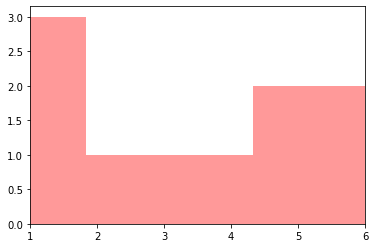

In [3]:
# your code here
sns.distplot(df,bins=6,color='red',kde=False)
plt.xlim(1, 6)
plt.show()
#paolo: ok but results should be ordered by value. You should have roll_index on x and value of roll on y
# ordered from smallest value to biggest or viceversa

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

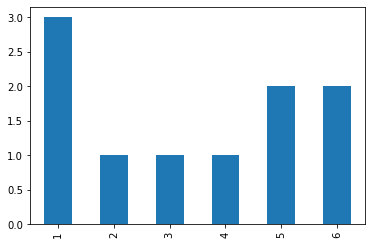

'\nyour comments here\n\nWhen there is a missing value the frequency distribution plot will show now blanks like in in the displot\n'

In [4]:
fig, ax = plt.subplots()
df[df.columns[0]].value_counts().sort_index(ascending=True).plot(ax=ax, kind='bar')
plt.show()

"""
your comments here

When there is a missing value the frequency distribution plot will show now blanks like in in the displot
"""
#Paolo: ok try histogramme instead of barplot

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
# your code here
def mean(df):
    return sum(df[df.columns[0]].to_list())/ len(df)
mean(df) 

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
results = pd.DataFrame(df.value_counts()).reset_index()
results.columns.values[1] = "counts"
results['totals'] = results.results * results.counts
results.totals.sum() / results.counts.sum()

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [7]:
# your code here
def median(df):
    lst = df[df.columns[0]].to_list()
    if (len(lst) %2) == 0:
        index = len(lst) // 2
        return sum(lst[index-1:index+1]) / 2 
    
    else: 
        index = len(df) // 2 + (len(df) % 2)
        return lst[index]



#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [8]:
# your code here

def quartiles(df):   
    md = median(df)
    lst = df[df.columns[0]].to_list()
    if (len(df)) // 2 % 2 == 0:
        index = (len(df)) // 2 
    else:
        index = (len(df)) // 2 + 1 
    
    first_quartile = median(df[0:index])
    third_quartile = median(df[index:len(df)])
    
    #output is now a combination of floats and integers. Should be solved to prettify it. 
    return [(lst[0],first_quartile),(first_quartile,md),(md,third_quartile),(third_quartile,lst[-1])]
     
    
#Paolo:ok does the fucntion work, did you test it?

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [9]:
# your code here
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df = df[['value']]

In [10]:
"""
your comments here
dataset contains data from 100 roles with a six sided dice. There is one column unnamed which is a duplicate from the index columns
"""

'\nyour comments here\ndataset contains data from 100 roles with a six sided dice. There is one column unnamed which is a duplicate from the index columns\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [11]:
mean(df)

3.74

#### 3.- Now, calculate the frequency distribution.


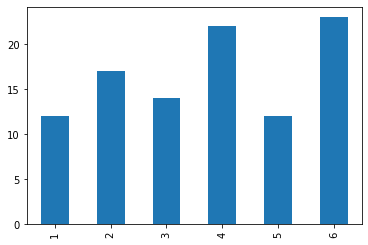

In [12]:
# your code here
fig, ax = plt.subplots()
df[df.columns[0]].value_counts().sort_index(ascending=True).plot(ax=ax, kind='bar')
plt.show()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

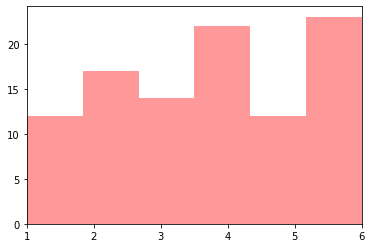

In [13]:
# your code here
sns.distplot(df,bins=6,color='red',kde=False)
plt.xlim(1, 6)
plt.show()

In [14]:
"""
your comments here
The distribution of the datapoints is more even between the different sides of the dices
"""

'\nyour comments here\nThe distribution of the datapoints is more even between the different sides of the dices\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

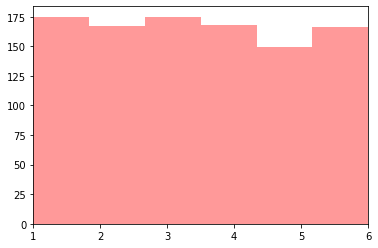

In [15]:
# your code here
df = pd.read_csv('../data/roll_the_dice_thousand.csv')
df = df[['value']]
sns.distplot(df,bins=6,color='red',kde=False)
plt.xlim(1, 6)
plt.show()


In [16]:
"""
your comments here
the numbers of datapoint by for each of the six sides of the dice are almost equal 
"""
#paolo: yes, why do you think?

'\nyour comments here\nthe numbers of datapoint by for each of the six sides of the dice are almost equal \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

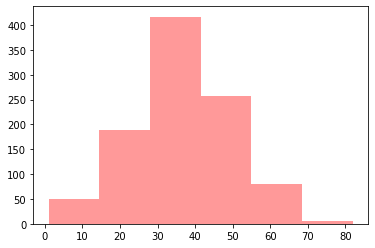

'I would guess that the mean would be between 30 and 40 and the std dev between 10 - 15'

In [17]:
# your code here
df = pd.read_csv('../data/ages_population.csv')
sns.distplot(df,bins=6,color='red',kde=False)
plt.show()
"""I would guess that the mean would be between 30 and 40 and the std dev between 10 - 15"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [18]:
# your code here
print(mean(df),df.observation.std())

36.56 12.816499625976762


In [19]:
"""
your comments here
So on average people are 36 years old with a standard deviation of 12.8 years.
"""

'\nyour comments here\nSo on average people are 36 years old with a standard deviation of 12.8 years.\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

In [20]:
# your code here
df = pd.read_csv('../data/ages_population2.csv')
df.head(5)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

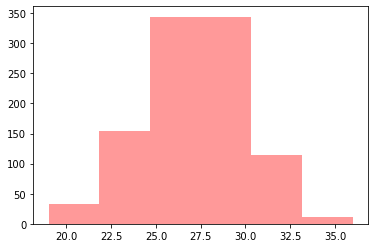

'\nyour comments here\n\nThe range of the min and max age is a lot smaller. So there is a lot less dispersion in age.Furthermore \nit seems that the mean and the std deviation are going to be a lot lower. Age is lower and dispersion is less.\n\n'

In [21]:
sns.distplot(df,bins=6,color='red',kde=False)
plt.show()

"""
your comments here

The range of the min and max age is a lot smaller. So there is a lot less dispersion in age.Furthermore 
it seems that the mean and the std deviation are going to be a lot lower. Age is lower and dispersion is less.

"""



#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [22]:
# your code here
print(mean(df),df.observation.std())

27.155 2.969813932689186


In [23]:
"""
your comments here
average is lower than in step 2 and the dispersion is less.
"""

'\nyour comments here\naverage is lower than in step 2 and the dispersion is less.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

In [24]:
# your code here
df = pd.read_csv('../data/ages_population3.csv')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [25]:
# your code here
print(mean(df),df.observation.std())
#paolo: ok, can you plot the data? That would help the analysis you will see a distribution
# with two peaks

41.989 16.144705959865934


In [26]:
"""
your comments here
The mean is higher. So on average the people are older but the dispersion is also higher. So the age of the perop 
that live in the area is more dispersed, 
"""

'\nyour comments here\nThe mean is higher. So on average the people are older but the dispersion is also higher. So the age of the perop \nthat live in the area is more dispersed, \n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [27]:
# your code here
median(df)

38.5

In [28]:
"""
your comments here
The mean is almost 42 while the median is 38.5. This means that there are some people in the 3rd and fourth percentile with quite
older ages. 
"""

'\nyour comments here\nThe mean is almost 42 while the median is 38.5. This means that there are some people in the 3rd and fourth percentile with quite\nolder ages. \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [29]:
# your code here
df.quantile([i/10 for i in range(0,10,2)])

,observation
0.0,1.0
0.2,28.0
0.4,36.0
0.6,45.0
0.8,57.0


In [30]:
"""
your comments here
More than sixty percent of the population is older than 36 which might explain why the mean is higher than the median.
"""
#paolo: yes, what is the main difference between median and mean?

'\nyour comments here\nMore than sixty percent of the population is older than 36 which might explain why the mean is higher than the median.\n'

In [33]:
#paolo: check ok!

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [31]:
# your code here

In [32]:
"""
your comments here
"""

'\nyour comments here\n'